# Airbnb in Toronto
## Data Analysis Using Python
<hr style="border:1px solid gray">

### Project Objective

The primary goal of this project is to get an overview of the Airbnb market in Toronto, Ontario. I will be analyzing the trend of the Airbnb market from September 7, 2022 until June 5, 2023 and will focus on listings based on room type, average prices, and neighbourhoods. I chose this timeframe as it was the data available to me, and it was still a time frame sufficient enough to give valuable insights on Airbnb listings within the city.

The project will involve using Python to clean, explore, visualize, and analyze the data to find insights. I have also created a Tableau dashboard using the cleaned dataset. 

The Tableau dashboard can be found here: https://public.tableau.com/app/profile/ken.loh/viz/TorontoAirbnbListings_16899525753990/Dashboard1

### Data

I will be using Airbnb data from Inside AirBnb (http://insideairbnb.com/), which provides data and advocacy about Airbnb's impact on residential communities. They source the data from publicly available information from the Airbnb website, and they provide data for the last 12 months for cities around the world. I will be using the data for Toronto and it was gathered in four time periods; September 7, 2022, December 2022, March 2023, and the latest, June 5, 2023, for a total of four seperate datasets.

The website provides csv files for datasets with different information, such as for datasets focused solely on review details or neighbourhood geo data. I will be using the 'Detailed Listings' data, named listings.csv.gz, which gives all listing details that they have scraped from the Airbnb website instead of just summary information. 

### Assumptions

There are some assumptions on the data source to be aware of, and the full list is here: http://insideairbnb.com/data-assumptions/. 

The main points to keep in mind for this project is that Inside Airbnb scrapes publicly available data from the official Airbnb website, which does not guarantee any accuracy. The listings can also deleted or modified in the Airbnb platform after the data is scraped, so the data presented is only a snapshot of listings available at a particular time. Nevertheless, this data is a good enough representation for what I want to do.

<hr style="border:1px solid gray">

### Preliminaries

In [1]:
# Import packages required.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [2]:
# Import June data into Python from downloaded csv file.
df = pd.read_csv('C:/Users/Ken/Desktop/June 5 2023 - listings.csv')

In [3]:
# Checking first three rows of dataset. 
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20230605223346,2023-06-06,previous scrape,Home in Toronto · ★5.0 · 5 bedrooms · 7 beds ·...,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.07
1,8077,https://www.airbnb.com/rooms/8077,20230605223346,2023-06-06,city scrape,Rental unit in Toronto · ★4.84 · 1 bedroom · 1...,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.01
2,643389,https://www.airbnb.com/rooms/643389,20230605223346,2023-06-06,previous scrape,Rental unit in Toronto · ★4.0 · Studio · 1 bed...,A south facing window lets in plenty of sunlig...,Parkdale is a nice neighbourhood not far from ...,https://a0.muscache.com/pictures/1f40acd4-4b93...,3217095,...,4.67,4.33,3.67,NaN,f,1,1,0,0,0.04


In [4]:
# Checking number of rows and columns. 
# There are too many columns to work with, so we need to choose only the ones we need.
df.shape

(22356, 75)

In [5]:
# Checking the names of all columns, checking for missing values, and noting the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22356 entries, 0 to 22355
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22356 non-null  int64  
 1   listing_url                                   22356 non-null  object 
 2   scrape_id                                     22356 non-null  int64  
 3   last_scraped                                  22356 non-null  object 
 4   source                                        22356 non-null  object 
 5   name                                          22356 non-null  object 
 6   description                                   22124 non-null  object 
 7   neighborhood_overview                         10132 non-null  object 
 8   picture_url                                   22356 non-null  object 
 9   host_id                                       22356 non-null 

I need to select only the columns that are relevant to my analysis.
Inside Airbnb provides a data dictionary that explains what the columns represent, making the selection process much easier.

I decide to keep these columns:

1) 'last_scraped' - this is the latest date the data was scraped, which will be useful for grouping listings by time period.

2) 'neighbourhood_cleansed' - neighbourhood that was geocoded using latitude/longitude instead of using what was provided by hosts. The column with neighbourhood info provided by the host also had many missing values (10132 non-null values compared to 22356 rows as seen above) so it would not be as useful. 

3) 'room_type'   

4) 'minimum_nights' - kept this in order to filter for listings with unrealistic minimum night requirements, such as for over 365 days. 

5) 'price'   

6) 'availability_30' - listing availability x number of days in the future       
7) 'availability_60'     
8) 'availability_90'     
9) 'availability_365'

10) latitude - latitude and longitude data for Tableau   
11) longitude 

12) id - data for Tableau

In [6]:
# Selecting the columns I want to keep.
df_june = df[['last_scraped', 'neighbourhood_cleansed', 'room_type', 'price', 'minimum_nights'\
              , 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'latitude', 'longitude', 'id']]

In [7]:
# Removing listings that have 0 availability from 30, 60, 90, and 365 days in future.
# These are not bookable for at least a year in the future so I decide to remove these listings for my analysis.
df_june = df_june[(df_june['availability_30'] != 0) & (df_june['availability_60'] != 0) & (df_june['availability_90'] != 0) &\
        (df_june['availability_365'] != 0)]

In [8]:
# Now down to 15058 rows (from 22356 rows) and 9 columns (from 75 columns).
df_june.shape

(15058, 12)

Max for minimum_nights column: 1125


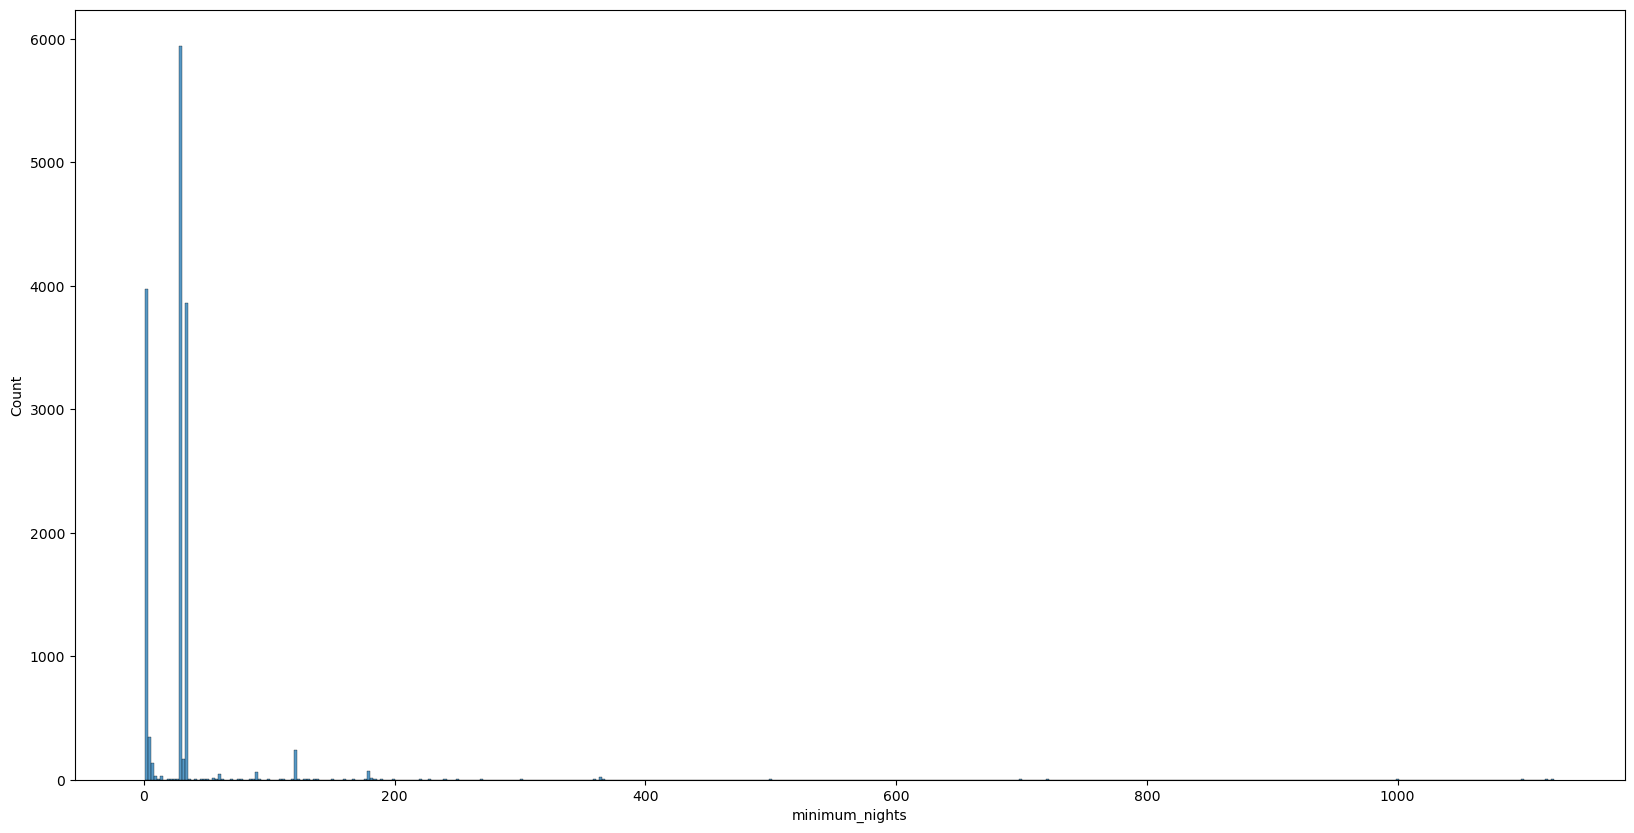

In [9]:
# Checking distribution and max value of minimum_nights.
plt.figure(figsize=(20, 10))
sns.histplot(df_june['minimum_nights'])
print('Max for minimum_nights column: ' + str(df_june['minimum_nights'].max()))

The histogram above shows that there are minimum day requirements that go up to a max of 1125 days. I decide to get rid of listings that have minimum requirements that make them un-bookable or unrealistic.

First I need to look at the value counts of this distribution to get a clearer idea at what the most common minimum nights requirements are. 

In [10]:
# Take the value counts of only the first 20, as the list is long.
print(df_june['minimum_nights'].value_counts()[0:20])

28     5172
33     3858
1      1912
2      1393
3       673
30      551
29      218
4       180
31      168
5       165
121     108
7       104
120      87
180      71
90       62
122      43
60       42
6        30
14       26
10       21
Name: minimum_nights, dtype: int64


The minimum nights of 28 and 33 have the most number of listings compared to the others. I would have expected minimum nights of 1-7 days to be the most listed, but this is not the case. 

As 33 minimum days has a lot of listings, I decide to remove all the listings above minimum nights of 33. This is because listings above a 33 day minimum night requirement do not seem like a realistic booking to me. 

In [11]:
# Checking how many listings have minimum nights requirements of over 33 days.
len(df_june[df_june['minimum_nights'] > 33])

557

In [12]:
# Removing listings that have minimum night requirements of over 33 days.
df_june = df_june.drop(df_june[df_june['minimum_nights'] > 33].index)

In [13]:
# Making sure the correct number of rows were removed.
len(df_june)

14501

In [14]:
# The 'price' column needs to be converted to 'float' in order to do calculations.
df_june['price'].dtype

dtype('O')

In [15]:
# Convert 'price' column to 'float'. Must remove '$' and ','.
df_june['price'] = df_june.loc[:]['price'].str.replace('$', '', regex=False)
df_june['price'] = df_june.loc[:]['price'].str.replace(',', '')
df_june['price'] = df_june['price'].astype('float')

In [16]:
# Confirming it is now 'float' datatype.
df_june['price'].dtype

dtype('float64')

In [17]:
# Checking value counts of room type.
df_june['room_type'].value_counts()

Entire home/apt    9880
Private room       4537
Shared room          83
Hotel room            1
Name: room_type, dtype: int64

In [18]:
# Noticed there is only one for hotel room. We are not looking at hotel room listings so I will remove them from the dataset.
df_june = df_june.drop(df_june[df_june['room_type'] == 'Hotel room'].index)

In [19]:
# Checking value counts of room type and to confirm hotel has been dropped.
df_june['room_type'].value_counts()

Entire home/apt    9880
Private room       4537
Shared room          83
Name: room_type, dtype: int64

In [20]:
# Checking min/max values.
df_june['price'].describe()

count    14500.000000
mean       206.156000
std        289.229918
min         14.000000
25%        100.000000
50%        135.000000
75%        230.000000
max      12400.000000
Name: price, dtype: float64

The max for price is 12400, which is not realistic for an Airbnb booking, and also this is not Airbnb Luxe.
Manually checked the listings that were astronomically high to confirm that they were not bookable.
I am trying to get as accurate a representation as I can of Airbnb listings that are realistic and bookable for my analysis.

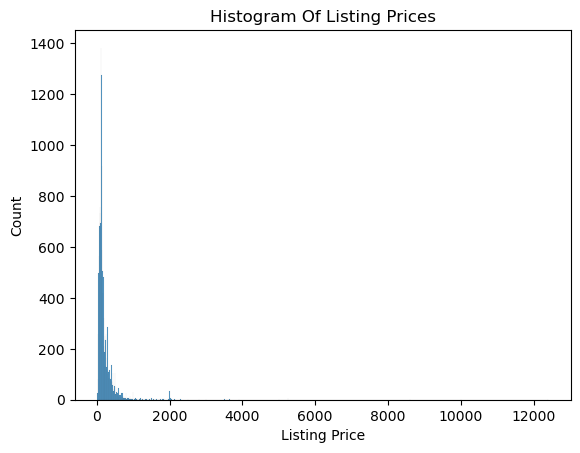

In [21]:
# Visualizing distribution of prices to get a quick overview of what it looks like.
sns.histplot(df_june['price'])
plt.title('Histogram Of Listing Prices')
plt.xlabel('Listing Price')

plt.show()

Taking a look at the histogram, we can clearly see some prices that are not realistic. These should not be part of the dataset for analysis as it will not give an accurate reading of what listings are actually available. I decide to get rid of outliers.

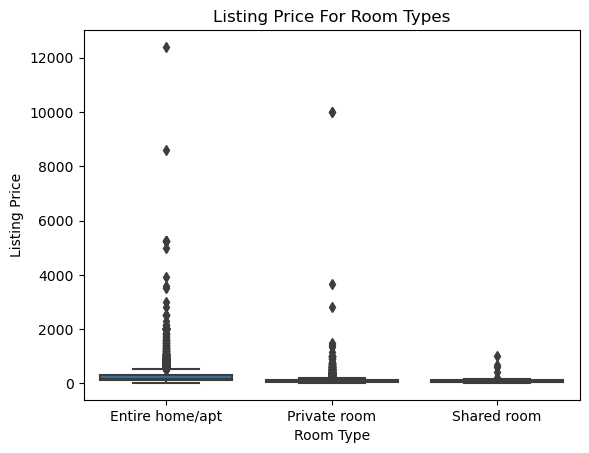

In [22]:
# I first visualize how many outliers I am dealing with by creating a boxplot with room type and listing prices.
sns.boxplot(data=df_june, x='room_type', y='price', order=['Entire home/apt', 'Private room', 'Shared room'])
plt.xlabel('Room Type')
plt.ylabel('Listing Price')
plt.title('Listing Price For Room Types')

plt.show()

I can see that the spread of outliers for Entire home/apt and Private room is wide, and there are many outliers for both of thse room types. There are few outliers for Shared room, but that can also be because it has the least amount of listings.

The next step is to calculate how many outliers there are for each room type, and then removing them from the dataset. I decide to do it seperately for each room type as each room type would most likely have a very different price range, so it wouldn't make as much sense to combine them all when doing this. 

I first calculate the 25th quantile and 75th quantile, and use that to calculate the interquartile range (iqr). We then use the iqr to find the upper and lower limits, which allows us to find the listings that lie outside these limits and remove them. I also include the number of outliers found so that I know how many rows are being removed.

In [23]:
# Finding outliers for each room type.
# Entire home/apt
percentile25 = df_june[df_june['room_type'] == 'Entire home/apt']['price'].quantile(0.25)
percentile75 = df_june[df_june['room_type'] == 'Entire home/apt']['price'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(f'Upper limit: {upper_limit}\nLower limit: {lower_limit}\n')
outliers1 = df_june[((df_june['room_type'] == 'Entire home/apt') & (df_june['price'] > upper_limit)) |\
                     ((df_june['room_type'] == 'Entire home/apt') & (df_june['price'] < lower_limit))]
print('Outliers for Entire home/apt: ' + str(len(outliers1)))

Upper limit: 537.0
Lower limit: -119.0

Outliers for Entire home/apt: 624


In [24]:
# Private room
percentile25 = df_june[df_june['room_type'] == 'Private room']['price'].quantile(0.25)
percentile75 = df_june[df_june['room_type'] == 'Private room']['price'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(f'Upper limit: {upper_limit}\nLower limit: {lower_limit}\n')
outliers2 = df_june[((df_june['room_type'] == 'Private room') & (df_june['price'] > upper_limit)) |\
                     ((df_june['room_type'] == 'Private room') & (df_june['price'] < lower_limit))]
print('Outliers for Private room: ' + str(len(outliers2)))

Upper limit: 200.0
Lower limit: -16.0

Outliers for Private room: 332


In [25]:
# Shared room
percentile25 = df_june[df_june['room_type'] == 'Shared room']['price'].quantile(0.25)
percentile75 = df_june[df_june['room_type'] == 'Shared room']['price'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(f'Upper limit: {upper_limit}\nLower limit: {lower_limit}\n')
outliers3 = df_june[((df_june['room_type'] == 'Shared room') & (df_june['price'] > upper_limit)) |\
                     ((df_june['room_type'] == 'Shared room') & (df_june['price'] < lower_limit))]
print('Outliers for Shared room: ' + str(len(outliers3)))

Upper limit: 197.5
Lower limit: -38.5

Outliers for Shared room: 7


In [26]:
# I use the pandas.concat function to combine the outlier variables I created so that I can remove them in one line.
df_june = df_june.drop(pd.concat([outliers1, outliers2, outliers3]).index)        

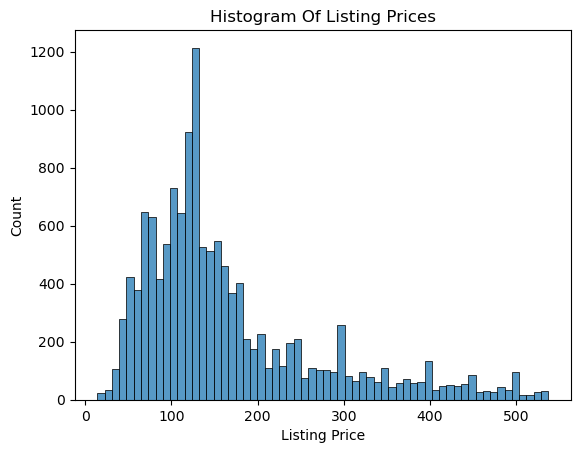

In [27]:
# Visualizing the distribution again after removing the outliers.
sns.histplot(df_june['price'])
plt.title('Histogram Of Listing Prices')
plt.xlabel('Listing Price')

plt.show()

The distribution of prices now look more reasonable for Airbnb Listings.

In [28]:
# I now want to convert the 'last_scraped' column to datetime so that I can manipulate it by date.
df_june['last_scraped'].dtype

dtype('O')

In [29]:
# Convert 'last_scraped' column to datetime.
df_june['last_scraped'] = pd.to_datetime(df_june['last_scraped'])
df_june['last_scraped'].dtype

dtype('<M8[ns]')

In [30]:
# Extract the month from column 'last_scraped' and put it in a new column 'month'.
df_june['month'] = df_june['last_scraped'].dt.strftime('%B')

In [31]:
# Reset index as we removed many rows. 
df_june = df_june.reset_index(drop=True)

In [32]:
# Checking first few rows of dataframe to make sure all the changes are correct.
df_june.head()

,last_scraped,neighbourhood_cleansed,room_type,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,latitude,longitude,id,month
0,2023-06-06,Roncesvalles,Private room,65.0,28,28,58,88,88,43.64400,-79.44270,1194984,June
1,2023-06-06,Morningside,Entire home/apt,190.0,28,7,7,26,300,43.78370,-79.20675,654048,June
2,2023-06-06,Waterfront Communities-The Island,Private room,125.0,1,2,2,2,2,43.64482,-79.39416,1202446,June
3,2023-06-06,East End-Danforth,Entire home/apt,81.0,28,3,3,33,308,43.68614,-79.29126,666670,June
4,2023-06-06,Cabbagetown-South St.James Town,Entire home/apt,225.0,28,23,53,83,358,43.66667,-79.37502,669162,June


In [33]:
# Comparing original dataset number of rows with new cleaned dataset rows.
print('Original June dataset length: ' + str(len(pd.read_csv('C:/Users/Ken/Desktop/June 5 2023 - listings.csv'))))
print('Cleaned June dataset Length: ' + str(len(df_june)))

Original June dataset length: 22356
Cleaned June dataset Length: 13537


The dataset for June is now cleaned and ready to do analysis on. The dataset went from 22,356 rows to 13,537 rows, and from 75 columns down to 13 columns, with one of the columns being one I created ('month'). As this was only for the June 2023 dataset, I still need to import and clean the remaining three datasets (March 2023, December 2022, and September 2022) using the same criteria. 

As I already did the steps manually for June, I will create a function that will help me import and clean the remaining csv files using the same processes, saving me a lot of time. 

This will also set up an easy way for me to import and incorporate any new data that will be released from the same source, as all I will need to do is download the csv file and import it using this function.

In [34]:
# Create csv import function to help me with the three other csv files.
def csv_import(csv_location):
    """
    Imports csv file and returns cleaned dataframe with same criteria as the June dataset.
    """
    df = pd.read_csv(csv_location)
    # Selecting columns
    df = df[['last_scraped', 'neighbourhood_cleansed', 'room_type', 'price', 'minimum_nights', \
             'availability_30', 'availability_60', 'availability_90', 'availability_365', 'latitude', 'longitude', 'id']]
    # Dropping rows with availabilities for 30-365 days in future with a value of 0
    df = df[(df['availability_30'] != 0) & (df['availability_60'] != 0) & (df['availability_90'] != 0) &\
        (df['availability_365'] != 0)]
    # Dropping rows with minimum nights of more than 33 days
    df = df.drop(df[df['minimum_nights'] > 33].index)
    # Converting 'price' column from string to float
    df['price'] = df.loc[:]['price'].str.replace('$', '', regex=False)
    df['price'] = df.loc[:]['price'].str.replace(',', '')
    df['price'] = df['price'].astype('float')
    # Drop room type 'hotel'
    df = df.drop(df[df['room_type'] == 'Hotel room'].index)
    # Outliers
    # Entire home/apt
    percentile25 = df[df['room_type'] == 'Entire home/apt']['price'].quantile(0.25)
    percentile75 = df[df['room_type'] == 'Entire home/apt']['price'].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr
    outliers1 = df[((df['room_type'] == 'Entire home/apt') & (df['price'] > upper_limit)) |\
                     ((df['room_type'] == 'Entire home/apt') & (df['price'] < lower_limit))]
    # Private room
    percentile25 = df[df['room_type'] == 'Private room']['price'].quantile(0.25)
    percentile75 = df[df['room_type'] == 'Private room']['price'].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr
    outliers2 = df[((df['room_type'] == 'Private room') & (df['price'] > upper_limit)) |\
                     ((df['room_type'] == 'Private room') & (df['price'] < lower_limit))]
    # Shared room
    percentile25 = df[df['room_type'] == 'Shared room']['price'].quantile(0.25)
    percentile75 = df[df['room_type'] == 'Shared room']['price'].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr
    outliers3 = df[((df['room_type'] == 'Shared room') & (df['price'] > upper_limit)) |\
                     ((df['room_type'] == 'Shared room') & (df['price'] < lower_limit))] 
    # Drop outliers
    df = df.drop(pd.concat([outliers1, outliers2, outliers3]).index)    
    # Converting column 'last_scraped' to datetime
    df['last_scraped'] = pd.to_datetime(df['last_scraped'])
    df['month'] = df['last_scraped'].dt.strftime('%B')
    # Reset index
    df = df.reset_index(drop=True)
    return df

In [35]:
# Use function for March 2023.
df_mar = csv_import('C:/Users/Ken/Desktop/March 9 2023 - listings.csv')

In [36]:
# Confirming the import completed successfully and comparing with length of raw dataset.
print('Original March dataset length: ' + str(len(pd.read_csv('C:/Users/Ken/Desktop/March 9 2023 - listings.csv'))))
print(df_mar.shape)
df_mar.head()

Original March dataset length: 17997
(9590, 13)


,last_scraped,neighbourhood_cleansed,room_type,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,latitude,longitude,id,month
0,2023-03-10,The Beaches,Entire home/apt,90.0,28,5,8,38,38,43.67239,-79.28858,40701,March
1,2023-03-10,High Park-Swansea,Entire home/apt,142.0,28,8,9,29,224,43.65374,-79.45359,702286,March
2,2023-03-10,Wexford/Maryvale,Entire home/apt,160.0,2,24,48,78,352,43.74922,-79.29188,43964,March
3,2023-03-10,Rosedale-Moore Park,Entire home/apt,126.0,28,30,60,90,365,43.67193,-79.38590,44452,March
4,2023-03-10,Rosedale-Moore Park,Private room,90.0,28,30,60,90,365,43.67180,-79.38488,45893,March


In [37]:
# Use function for December 2022.
df_dec = csv_import('C:/Users/Ken/Desktop/December 6 2022 - listings.csv')
print('Original December dataset length: ' + str(len(pd.read_csv('C:/Users/Ken/Desktop/December 6 2022 - listings.csv'))))
print(df_dec.shape)
df_dec.head()

Original December dataset length: 16761
(9185, 13)


,last_scraped,neighbourhood_cleansed,room_type,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,latitude,longitude,id,month
0,2022-12-07,Woodbine Corridor,Private room,37.0,30,21,21,28,268,43.67639,-79.31017,625877,December
1,2022-12-07,Waterfront Communities-The Island,Entire home/apt,300.0,28,23,53,83,358,43.64356,-79.39030,638586,December
2,2022-12-06,The Beaches,Entire home/apt,88.0,28,29,59,89,89,43.67239,-79.28858,40701,December
3,2022-12-06,Junction Area,Entire home/apt,120.0,28,4,13,13,164,43.66308,-79.47795,643916,December
4,2022-12-07,Morningside,Entire home/apt,210.0,28,28,58,88,363,43.78370,-79.20675,654048,December


In [38]:
# Use function for September 2022.
df_sep = csv_import('C:/Users/Ken/Desktop/September 7 2022 - listings.csv')
print('Original September dataset length: ' + str(len(pd.read_csv('C:/Users/Ken/Desktop/September 7 2022 - listings.csv'))))
print(df_sep.shape)
df_sep.head()

Original September dataset length: 16035
(7600, 13)


,last_scraped,neighbourhood_cleansed,room_type,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,latitude,longitude,id,month
0,2022-09-07,The Beaches,Entire home/apt,359.0,2,18,48,48,98,43.66680,-79.30347,27827073,September
1,2022-09-07,The Beaches,Entire home/apt,185.0,2,6,27,52,327,43.67634,-79.29922,27658681,September
2,2022-09-08,Waterfront Communities-The Island,Entire home/apt,495.0,28,6,36,66,156,43.64787,-79.39333,27831815,September
3,2022-09-08,Roncesvalles,Entire home/apt,90.0,2,3,3,3,3,43.64544,-79.44713,27832397,September
4,2022-09-07,Oakridge,Private room,54.0,28,15,45,75,75,43.70043,-79.27660,27675456,September


In [39]:
# I now want to join all the dataframes into one dataframe.
df_joined = pd.concat([df_june, df_mar, df_dec, df_sep])
# Now the joined dataset has a total of 39,912 rows and 13 columns, and is now ready to be analyzed.
df_joined.shape

(39912, 13)

In [40]:
# Reset index and double check first few rows to make sure it is correct.
df_joined = df_joined.reset_index(drop=True)
df_joined.head()

,last_scraped,neighbourhood_cleansed,room_type,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,latitude,longitude,id,month
0,2023-06-06,Roncesvalles,Private room,65.0,28,28,58,88,88,43.64400,-79.44270,1194984,June
1,2023-06-06,Morningside,Entire home/apt,190.0,28,7,7,26,300,43.78370,-79.20675,654048,June
2,2023-06-06,Waterfront Communities-The Island,Private room,125.0,1,2,2,2,2,43.64482,-79.39416,1202446,June
3,2023-06-06,East End-Danforth,Entire home/apt,81.0,28,3,3,33,308,43.68614,-79.29126,666670,June
4,2023-06-06,Cabbagetown-South St.James Town,Entire home/apt,225.0,28,23,53,83,358,43.66667,-79.37502,669162,June


## Analysis

### Listings Based On Room Type

I will first check the number of listings per room type.

In [41]:
# Checking total number of listings based on room type
df_joined.groupby('room_type').count()['price']

room_type
Entire home/apt    27027
Private room       12568
Shared room          317
Name: price, dtype: int64

The room type 'Entire home/apt' has the most listings, followed by 'Private room'. 'Shared room' has significantly less listings.
I want to visualize how the number of listings per room type has changed over the time period.

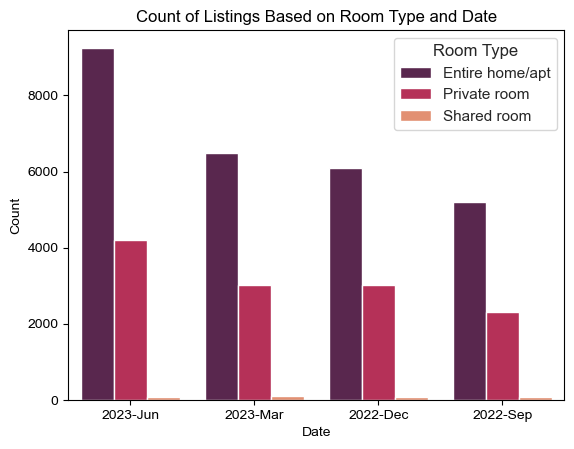

In [42]:
# Creating countplot based on room type, in order from latest date to oldest date.
fig, ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.countplot(data=df_joined, x='month', hue='room_type', order = df_joined['month'].value_counts().index,\
              hue_order=['Entire home/apt', 'Private room', 'Shared room'], palette='rocket')
# Xtick labels
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '2023-Jun'
labels[1] = '2023-Mar'
labels[2] = '2022-Dec'
labels[3] = '2022-Sep'
ax.set_xticklabels(labels)

plt.title('Count of Listings Based on Room Type and Date')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(title='Room Type')

plt.show()

This countplot shows that listings for 'Entire home/apt' had the most growth throughout the period. 'Private room' listings had some growth, but still has less than half of the listings of 'Entire home/apt' for the latest date. There were very few listings for 'Shared room' and it was practically the same throughout the period.

I now want to look at listings based on neighbourhood and how this has changed throughout the time period.

### Listings Based On Neighbourhood

In [43]:
# I first want to see how many different neighbourhoods there are in the dataset.
len(df_joined['neighbourhood_cleansed'].unique())

140

In [44]:
# There are 140 unique names, which is too many to group by. Let's look at the top 10 neighbourhoods with the most listings.
df_joined['neighbourhood_cleansed'].value_counts()[0:10]

Waterfront Communities-The Island      6078
Kensington-Chinatown                   2389
Trinity-Bellwoods                      2135
Niagara                                1267
Annex                                  1062
Dovercourt-Wallace Emerson-Junction    1014
Bay Street Corridor                     933
South Riverdale                         822
Moss Park                               769
Willowdale East                         732
Name: neighbourhood_cleansed, dtype: int64

*Note: I learned from this list of neighbourhoods that Toronto has a neighbourhood named Niagara, which is different from the Niagara Falls area. I had to look this up as I was initially confused on why Niagara was included as a neighbourhood in Toronto. Good to know!*

In [45]:
# Creating a list with just the top 10 neighbourhoods.
df_joined['neighbourhood_cleansed'].value_counts()[0:10].index

Index(['Waterfront Communities-The Island', 'Kensington-Chinatown',
       'Trinity-Bellwoods', 'Niagara', 'Annex',
       'Dovercourt-Wallace Emerson-Junction', 'Bay Street Corridor',
       'South Riverdale', 'Moss Park', 'Willowdale East'],
      dtype='object')

In [46]:
# Setting up inputs for lineplot.
top_10 = ['Waterfront Communities-The Island', 'Kensington-Chinatown',
       'Trinity-Bellwoods', 'Niagara', 'Annex', 'Bay Street Corridor',
       'Dovercourt-Wallace Emerson-Junction', 'Moss Park', 'South Riverdale',
       'Church-Yonge Corridor']
top_10_count = df_joined[df_joined['neighbourhood_cleansed'].isin(top_10)]\
      .groupby(['month', 'neighbourhood_cleansed'], sort=False).count()['price'].reset_index()
top_10_count.head()

,month,neighbourhood_cleansed,price
0,June,Waterfront Communities-The Island,1489
1,June,South Riverdale,381
2,June,Church-Yonge Corridor,212
3,June,Bay Street Corridor,253
4,June,Dovercourt-Wallace Emerson-Junction,457


In [47]:
# Creating categorical order of months for lineplot.
top_10_count['month'] = pd.Categorical(top_10_count['month'], ['September', 'December', 'March', 'June'])

In [48]:
# Pivot dataframe to use it to create the lineplot.
pivot = pd.pivot_table(data=top_10_count, index=['month'], columns=['neighbourhood_cleansed'], values='price')
pivot.head()

neighbourhood_cleansed,Annex,Bay Street Corridor,Church-Yonge Corridor,Dovercourt-Wallace Emerson-Junction,Kensington-Chinatown,Moss Park,Niagara,South Riverdale,Trinity-Bellwoods,Waterfront Communities-The Island
month,,,,,,,,,,
September,226,194,140,159,181,180,251,123,210,1358
December,276,232,189,201,222,195,332,164,278,1591
March,277,254,174,197,480,190,363,154,316,1640
June,283,253,212,457,1506,204,321,381,1331,1489


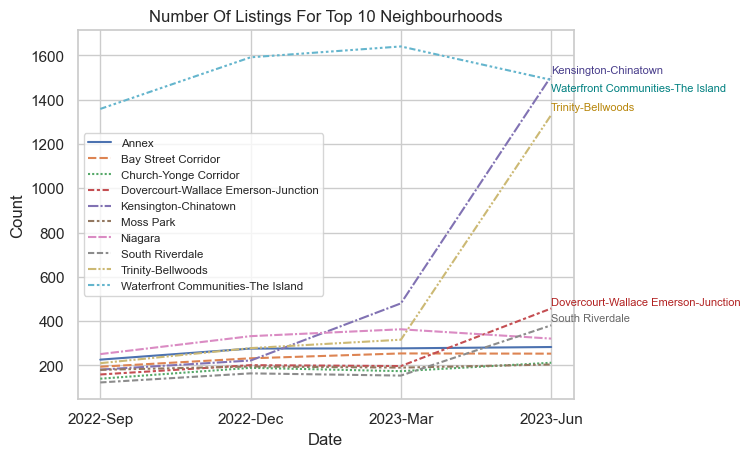

In [49]:
# Lineplot
fig, ax = plt.subplots()
sns.lineplot(data=pivot)

# Annotations for neighbourhood
style = dict(size=8, color='teal')
style2 = dict(size=8, color='darkslateblue')
style3 = dict(size=8, color='darkgoldenrod')
style4 = dict(size=8, color='firebrick')
style5 = dict(size=8, color='dimgray')
ax.text('June', 1440, "Waterfront Communities-The Island", ha='left', **style) 
ax.text('June', 1520, "Kensington-Chinatown", ha='left', **style2)
ax.text('June', 1350, "Trinity-Bellwoods", ha='left', **style3)
ax.text('June', 470, "Dovercourt-Wallace Emerson-Junction", ha='left', **style4)
ax.text('June', 400, "South Riverdale", ha='left', **style5)
# X-tick labels
ax.xaxis.set_ticks(['September', 'December', 'March', 'June'])
ax.set_xticklabels(['2022-Sep', '2022-Dec', '2023-Mar', '2023-Jun'])

plt.title('Number Of Listings For Top 10 Neighbourhoods')
plt.ylabel('Count')
plt.xlabel('Date')

plt.legend(fontsize='x-small')

plt.show()

From the plot above, I can see that the Waterfront Communities-The Island consistently had the highest listings from September 2022 until March 2023. An interesting observation is that two neighbourhoods, Kensington-Chinatown and Trinity-Bellwoods, had explosive growth from March 2023 to June 2023, with Kensington-Chinatown actually surpassing Waterfront Communities-The Island in the latest month. These three neighbourhoods had significantly more listings than all the other neighbourhoods in June 2023. Dovercourt-Wallace and South Riverdale more than doubled their amount of listings from March to June, but still did not have close to the number of listings of the top three neighbourhoods. All the other neighbourhoods stayed roughly the same.

I am curious to see what the ten least popular neighbourhoods are for listings.

In [50]:
# Bottom ten neighbourhoods based on number of listings.
df_joined['neighbourhood_cleansed'].value_counts()[-10:]

Playter Estates-Danforth             58
Humber Summit                        56
Guildwood                            52
Humber Heights-Westmount             45
Forest Hill South                    42
Bridle Path-Sunnybrook-York Mills    39
Morningside                          38
Elms-Old Rexdale                     33
Forest Hill North                    29
Kingsway South                       24
Name: neighbourhood_cleansed, dtype: int64

I want to plot the top ten neighbourhoods with the most listings and the bottom ten with the least number of listings in the same graph to get a visual representation of how many more listings there are in the top ten neighbourhoods compared to the bottom ten.

In [51]:
# Setting up the bottom 10 neighbourhoods for plotting.
top_bottom_10 = ['Waterfront Communities-The Island', 'Kensington-Chinatown',
       'Trinity-Bellwoods', 'Niagara', 'Annex', 'Bay Street Corridor',
       'Dovercourt-Wallace Emerson-Junction', 'Moss Park', 'South Riverdale',
       'Church-Yonge Corridor', 'Centennial Scarborough', 'Humber Summit', 'Forest Hill South',
       'Guildwood', 'Humber Heights-Westmount',
       'Bridle Path-Sunnybrook-York Mills', 'Morningside', 'Elms-Old Rexdale',
       'Forest Hill North', 'Kingsway South']
df_top_bottom_10 = df_joined[df_joined['neighbourhood_cleansed'].isin(top_bottom_10)]\
      .groupby('neighbourhood_cleansed').count()['price'].reset_index().sort_values('price', ascending=False)

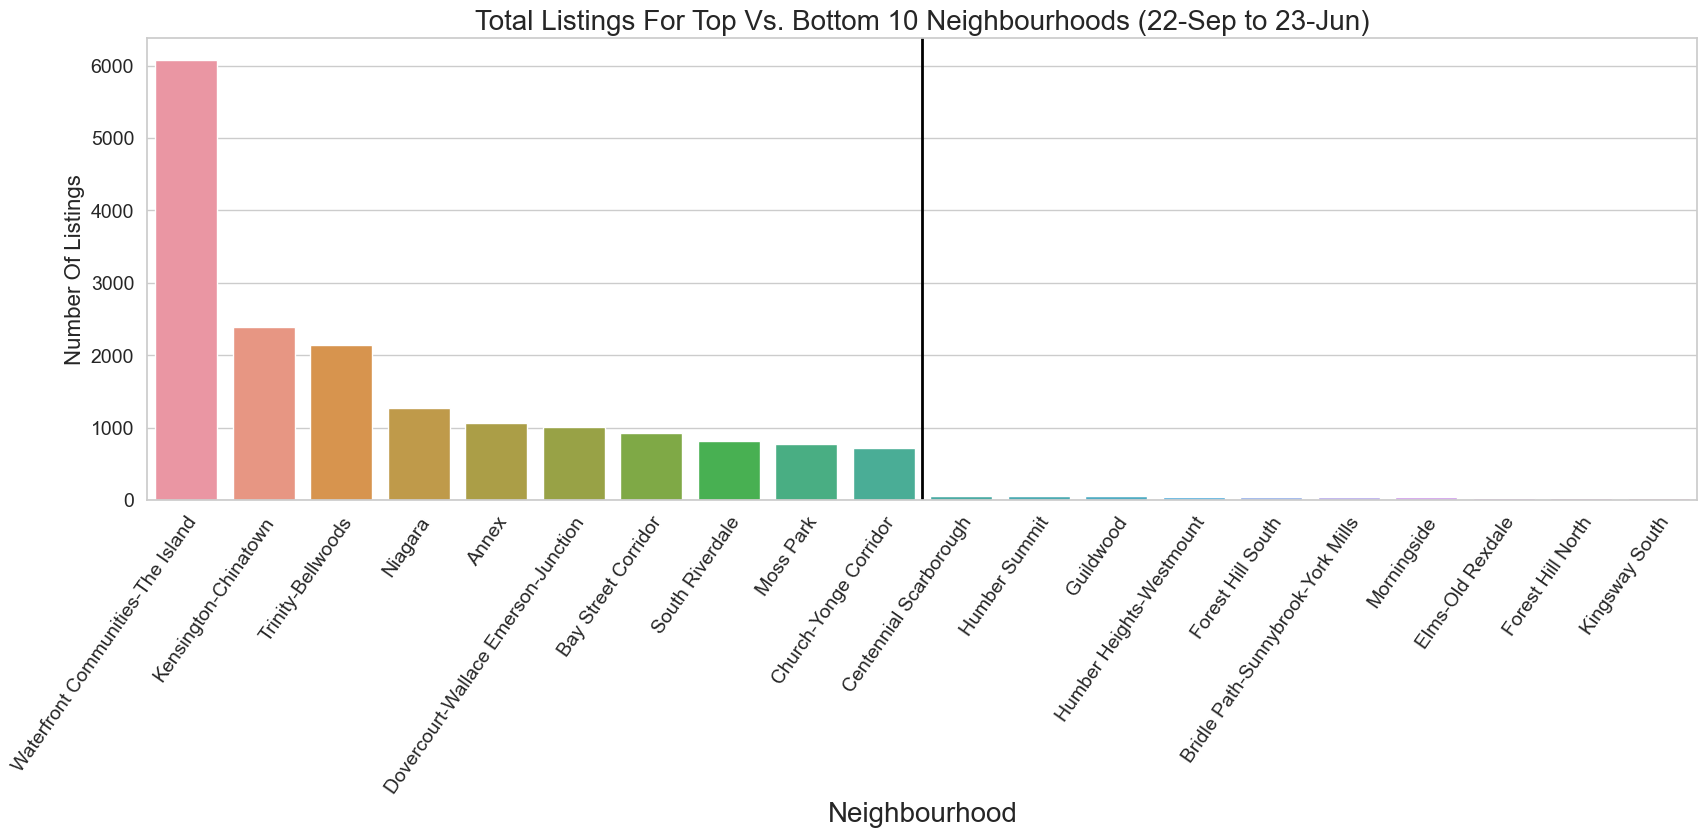

In [52]:
# Top 10 / Bottom 10 Neighbourhoods plot.
plt.figure(figsize=(20,6))
sns.barplot(data=df_top_bottom_10, x='neighbourhood_cleansed', y='price')
plt.xticks(rotation=55, ha='right', rotation_mode='anchor')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Neighbourhood', fontsize=20);
plt.ylabel('Number Of Listings', fontsize=16);
plt.title('Total Listings For Top Vs. Bottom 10 Neighbourhoods (22-Sep to 23-Jun)', fontsize=20)
plt.axvline(9.5, color='black', linestyle='solid', linewidth=2)
plt.show()

There are significantly more listings in the top ten most listed neighbourhoods compared to the bottom ten least listed. We can also see that the number one neighbourhood has more than double the listings of the next most listed neighbourhood. Waterfront Communities-The Island is the most popular neighbourhood for Airbnb listings.

Next, I'll look at how the prices have changed over the time period based on room type.

### Average Prices Based On Room Type

In [53]:
# Pivot dataframe in order to set up data for lineplot.
# Will be using the mean of prices per room type.
df_joined['month'] = pd.Categorical(df_joined['month'], ['September', 'December', 'March', 'June'])
pivot_prices = pd.pivot_table(data=df_joined, index=['month'], columns=['room_type'], values='price')
pivot_prices

room_type,Entire home/apt,Private room,Shared room
month,,,
September,243.545123,91.835492,60.513158
December,188.824034,79.221046,61.532468
March,185.511657,79.173884,67.636364
June,200.690471,88.346730,73.250000


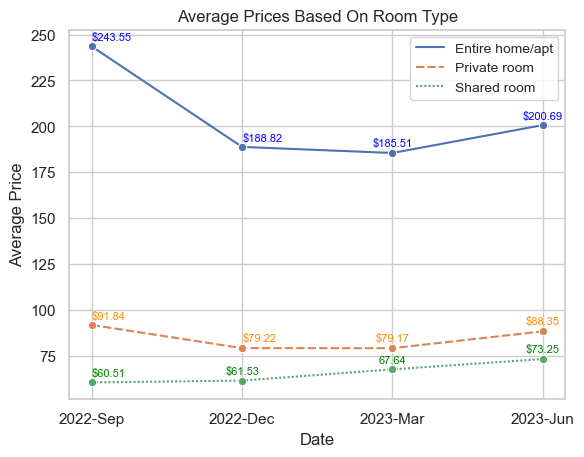

In [54]:
# Lineplot for mean prices
fig, ax = plt.subplots()
sns.lineplot(data=pivot_prices, marker='o')

style = dict(size=8, color='blue')
style2 = dict(size=8, color='darkorange')
style3 = dict(size=8, color='green')
# annotations for September
ax.text('September', 247, "$243.55", ha='left', **style) # Entire home/apt
ax.text('September', 95, "$91.84", ha='left', **style2) # Private room
ax.text('September', 64, "$60.51", ha='left', **style3) # Shared room
# annotations for December
ax.text('December', 192, "$188.82", ha='left', **style) 
ax.text('December', 83, "$79.22", ha='left', **style2)
ax.text('December', 65, "$61.53", ha='center', **style3)
# annotations for March
ax.text('March', 189, "$185.51", ha='center', **style) 
ax.text('March', 83, "$79.17", ha='center', **style2)
ax.text('March', 71, "67.64", ha='center', **style3)
# annotations for June
ax.text('June', 204, "$200.69", ha='center', **style) 
ax.text('June', 92, "$88.35", ha='center', **style2)
ax.text('June', 77, "$73.25", ha='center', **style3)

plt.legend(fontsize='small')

plt.title('Average Prices Based On Room Type')
plt.xlabel('Date')
plt.ylabel('Average Price')

ax.xaxis.set_ticks(['September', 'December', 'March', 'June'])
ax.set_xticklabels(['2022-Sep', '2022-Dec', '2023-Mar', '2023-Jun'])

plt.show()

Average prices for 'Entire home/apt' dropped from September 2022 until March 2023, before moving slightly higher in June 2023. This same pattern happened for 'Private room'. For 'Shared room', the average price has been steadily moving up throughout this same period. 

I want to look at changes in median prices just to see if we get the same result. As I removed the outliers earlier, I expect that it will not look too different.

### Median Prices Based On Room Type

In [55]:
# Pivot dataframe in order to set up data for lineplot, but using median instead of mean for the calculation.
pivot_median = pd.pivot_table(data=df_joined, index=['month'], columns=['room_type'], values='price', aggfunc=np.median)
pivot_median

room_type,Entire home/apt,Private room,Shared room
month,,,
September,203.0,80.0,44.0
December,165.0,70.0,52.0
March,160.0,70.0,55.0
June,159.0,81.0,60.0


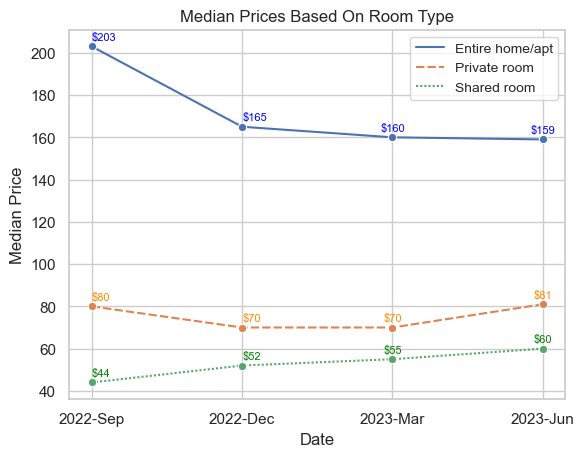

In [56]:
# lineplot for median prices
fig, ax = plt.subplots()
sns.lineplot(data=pivot_median, marker='o')
style = dict(size=8, color='blue')
style2 = dict(size=8, color='darkorange')
style3 = dict(size=8, color='green')
# annotations for September
ax.text('September', 206, "$203", ha='left', **style) 
ax.text('September', 83, "$80", ha='left', **style2)
ax.text('September', 47, "$44", ha='left', **style3)
# annotations for December
ax.text('December', 168, "$165", ha='left', **style) # ha = horizontal alignment. can be right, left, center.
ax.text('December', 73, "$70", ha='left', **style2)
ax.text('December', 55, "$52", ha='left', **style3)
# annotations for March
ax.text('March', 163, "$160", ha='center', **style) 
ax.text('March', 73, "$70", ha='center', **style2)
ax.text('March', 58, "$55", ha='center', **style3)
# annotations for June
ax.text('June', 162, "$159", ha='center', **style) 
ax.text('June', 84, "$81", ha='center', **style2)
ax.text('June', 63, "$60", ha='center', **style3)

plt.legend(fontsize='small')

plt.title('Median Prices Based On Room Type')
plt.xlabel('Date')
plt.ylabel('Median Price')

ax.xaxis.set_ticks(['September', 'December', 'March', 'June'])
ax.set_xticklabels(['2022-Sep', '2022-Dec', '2023-Mar', '2023-Jun'])

plt.show()

As expected, the plot based on median prices looks quite similar to the plot with average prices. The main difference is that the median price for 'Entire home/apt' did not increase from March 2023 to June 2023 like it did for average prices, meaning there must have been a good number of 'Entire home/apt' listings that had comparatively much higher prices. The patterns for 'Private room' and 'Shared room' look the same.

The last thing I want to look at before summarizing my findings is minimum nights. I would expect Airbnb rentals to have a majority of listings in the 1-7 day minimum nights range, but this was not the case. As I filtered the data by minimum nights already, I know that the max minimum nights value in the dataset is 33. 

I want to now visualize the count of each minimum night requirement in a plot in order to get an idea of how it is distributed.

### Looking Into Minimum Nights

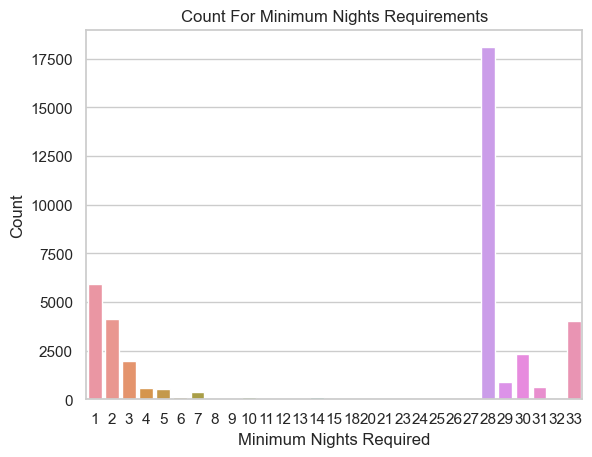

In [57]:
# Countplot
sns.countplot(x=df_joined['minimum_nights'])
plt.title('Count For Minimum Nights Requirements')
plt.xlabel('Minimum Nights Required')
plt.ylabel('Count')

plt.show()

This is very interesting as it is clear that the majority of listings in the dataset actually have a minimum night requirement of 28 days or longer. This tells me that there are actually not as many short-term rentals available as I first thought, as my thinking was that Airbnb mostly had listings for short-term rentals.

**According to the City of Toronto, short-term rentals are rentals that are less than 28 days**, which also means the short-term rental regulations only apply to these listings. **28 days or more means these are long-term rentals**. This may explain why there are so many listings with minimum nights at 28 days or more.

I want to take a closer look at this to get a clearer picture of long-term vs. short-term listings.

In [58]:
# The number of listings that have minimum night requirements of 28 days or more.
print('Listings with min. nights 28 days or more: ' + str(len(df_joined[df_joined['minimum_nights'] >= 28])))
print('Proportion of long-term rentals compared to total number of listings: ' + \
      str((len(df_joined[df_joined['minimum_nights'] >= 28]))/(len(df_joined))))

Listings with min. nights 28 days or more: 25951
Proportion of long-term rentals compared to total number of listings: 0.6502054519943876


In [59]:
# The number of listings that have minimum night requirements of less than 28 days.
print('Listings with min. nights less than 28 days: ' + str(len(df_joined[df_joined['minimum_nights'] < 28])))
print('Proportion of long-term rentals compared to total number of listings: ' + \
      str((len(df_joined[df_joined['minimum_nights'] < 28]))/(len(df_joined))))

Listings with min. nights less than 28 days: 13961
Proportion of long-term rentals compared to total number of listings: 0.3497945480056123


At least 65% of the listings have a requirement of 28 days or more. A majority of these listings are actually for long-term rentals instead of short-term.

I want to see if long-term rentals are only concentrated for a specific room type.

In [60]:
# Count of listings based on room type and minimum nights of 28 days or more.
df_joined[df_joined['minimum_nights'] >= 28]['room_type'].value_counts()

Entire home/apt    18242
Private room        7528
Shared room          181
Name: room_type, dtype: int64

In [61]:
# Count of listings based on room type and minimum nights of less than 28 days.
df_joined[df_joined['minimum_nights'] < 28]['room_type'].value_counts()

Entire home/apt    8785
Private room       5040
Shared room         136
Name: room_type, dtype: int64

Most of the listings that require minimum nights of 28 days or more are for room type 'Entire home/apt', which makes sense, but there is also a big proportion of them for 'Private room'. 

Now I want to take a look at the neighbourhoods and see if long-term/short-term rentals are different depending on the neighbourhood.

In [62]:
# Top ten neighbourhood listing counts for listings with minimum night requiremnts of 28 days or more.
df_joined[df_joined['minimum_nights'] >= 28]['neighbourhood_cleansed'].value_counts()[0:10]

Waterfront Communities-The Island      4057
Kensington-Chinatown                   2050
Trinity-Bellwoods                      1750
Niagara                                 725
Annex                                   720
Dovercourt-Wallace Emerson-Junction     715
Bay Street Corridor                     709
South Riverdale                         525
Willowdale East                         520
Wexford/Maryvale                        505
Name: neighbourhood_cleansed, dtype: int64

In [63]:
# Top ten neighbourhood listing counts for listings with minimum night requiremnts of less than 28 days.
df_joined[df_joined['minimum_nights'] < 28]['neighbourhood_cleansed'].value_counts()[0:10]

Waterfront Communities-The Island      2021
Niagara                                 542
Trinity-Bellwoods                       385
Annex                                   342
Kensington-Chinatown                    339
Dovercourt-Wallace Emerson-Junction     299
South Riverdale                         297
Moss Park                               292
Church-Yonge Corridor                   226
Bay Street Corridor                     224
Name: neighbourhood_cleansed, dtype: int64

I can immediately see that Kensington-Chinatown and Trinity-Bellwoods have significantly less listings when only looking at short-term rentals of less than 28 days. This means the growth from these two neighbourhoods came mostly from long-term rentals. 

I now want to visualize the change of the number of listings per neighbourhoods on a plot once again, but this time only for short-term rentals.

In [64]:
# Setting up inputs for plot. 
# I am now taking the same top 10 neighbourhoods based on listings with minimum night requirements of less than 28 days.
top_10_count2 = df_joined[(df_joined['minimum_nights'] < 28) & (df_joined['neighbourhood_cleansed'].isin(top_10))]\
      .groupby(['month', 'neighbourhood_cleansed'], sort=False).count()['price'].reset_index()
# Order for months
top_10_count2['month'] = pd.Categorical(top_10_count['month'], ['September', 'December', 'March', 'June'])
# Pivot for plot
pivot2 = pd.pivot_table(data=top_10_count2, index=['month'], columns=['neighbourhood_cleansed'], values='price')
pivot2.head()

neighbourhood_cleansed,Annex,Bay Street Corridor,Church-Yonge Corridor,Dovercourt-Wallace Emerson-Junction,Kensington-Chinatown,Moss Park,Niagara,South Riverdale,Trinity-Bellwoods,Waterfront Communities-The Island
month,,,,,,,,,,
September,89,55,49,69,96,71,118,75,87,609
December,62,55,60,71,107,60,127,79,107,403
March,82,44,50,74,77,72,138,63,80,423
June,109,70,67,85,59,89,159,80,111,586


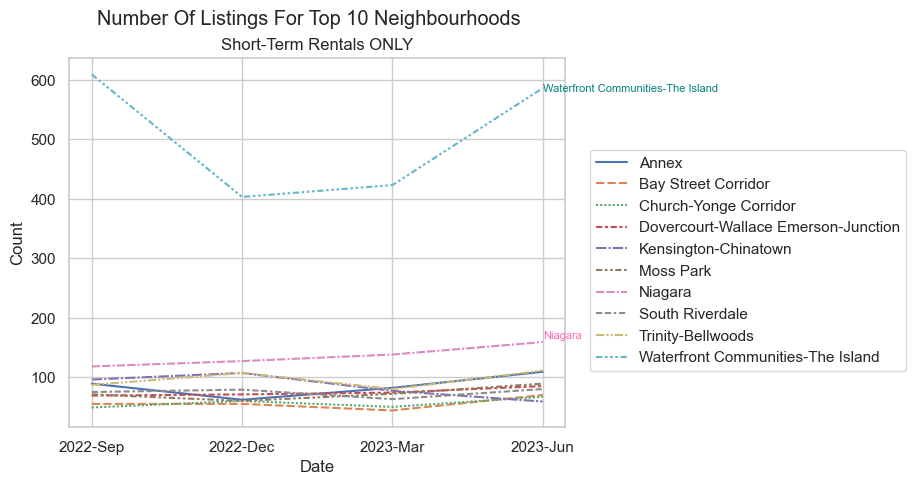

In [65]:
# Lineplot
fig, ax = plt.subplots()
sns.lineplot(data=pivot2)

# Annotations for neighbourhood
style = dict(size=8, color='teal')
style2 = dict(size=8, color='hotpink')
ax.text('June', 580, "Waterfront Communities-The Island", ha='left', **style) 
ax.text('June', 165, "Niagara", ha='left', **style2)
# X-tick labels
ax.xaxis.set_ticks(['September', 'December', 'March', 'June'])
ax.set_xticklabels(['2022-Sep', '2022-Dec', '2023-Mar', '2023-Jun'])

plt.title('Short-Term Rentals ONLY')
plt.suptitle('Number Of Listings For Top 10 Neighbourhoods')
plt.ylabel('Count')
plt.xlabel('Date')

plt.legend(bbox_to_anchor=(1.05, 0.75), loc='upper left', borderaxespad=0)

plt.show()

Without long-term rentals, the two neighbourhoods Kensington-Chinatown and Trinity-Bellwoods are no longer in the top three most listed neighbourhoods. In fact, only Waterfront Communities-The Island had actual growth for short-term rentals, but even then the number of listings are still significantly less than with long-term rentals included. I can also see that the neighbourhood Niagara had steady short-term rental growth throughout the period. However, all the other neighbourhoods stayed generally the same when it came to short-term rental listings.

I want to see how the proportion of long-term vs. short-term listings look like in the latest time period of June 2023.

In [66]:
print('Proportion of June long-term listings: ' +\
      str(round((len(df_june[(df_june['minimum_nights'] >= 28) & (df_june['month'] == 'June')]))/(len(df_june))*100, 2)) + '%')

Proportion of June long-term listings: 70.33%


In [67]:
print('Proportion of June short-term listings: ' +\
      str(round((len(df_june[(df_june['minimum_nights'] < 28) & (df_june['month'] == 'June')]))/(len(df_june))*100, 2)) + '%')

Proportion of June short-term listings: 29.67%


Majority of listings in June are for long-term rentals.

In [68]:
# Looking at proportions per room type
print(round(len(df_joined[df_joined['room_type'] == 'Entire home/apt'])/len(df_joined)*100, 2))
print(round(len(df_joined[df_joined['room_type'] == 'Private room'])/len(df_joined)*100, 2))
print(round(len(df_joined[df_joined['room_type'] == 'Shared room'])/len(df_joined)*100, 2))

67.72
31.49
0.79


<hr style="border:1px solid gray">

### Findings

- **Majority of listings are for long-term rentals (minimum nights 28 days or more). At least 65% of the listings in the dataset are for long-term listings.** Looking only at June listings, **70.33% of the listings were for long-term rentals**, while only 29.67% were for short-term rentals. **Long-term rental listings make up the majority of listings in Toronto and are the ones driving the growth.** There is almost no growth when looking at short-term rental listings in the city.


- **The most popular room type being listed is 'Entire home/apt', which is 67.72% of the listings in the dataset.** 31.49% are for 'Private room', and only 0.79% are for 'Shared room'.


- **The most popular neighbourhood for listings is Waterfront Communities-The Island, which makes up 15.23% of the whole dataset.** Kensington-Chinatown and Trinity Bellwoods had explosive growth in listings from March to June 2023, with Kensington-Chinatown actually surpassing Waterfront Communities-The Island in June. **However, this growth only came from long-term rentals.** When looking only at short-term rentals, these two neighbourhoods had negligible changes, while Waterfront Communities-The Island was the neighbourhood with the most growth in short-term rentals from March to June. Niagara was also the only neighbourhood with steady short-term listings growth from September 2022 to June 2023. **The general trend is that long-term listings are growing significantly, especially in Kensington-Chinatown and Trinity Bellwoods, while short-term listings are barely moving except in Waterfront Communities-The Island.**


- Average prices for 'Entire home/apt' and 'Private room' were decreasing from September 2022 to March 2023, **but have increased for the latest period in June.** Average prices for 'Shared room' have been increasing steadily since September 2022. This trend of increasing prices will most likely continue, as the median prices also support this pattern. This will need to be confirmed when the next Inside Airbnb dataset comes out. **The general trend is that prices are increasing for Airbnb listings.**

<hr style="border:1px solid gray">

### Tableau

I have created a Tableau Dashboard using the cleaned dataset:

https://public.tableau.com/app/profile/ken.loh/viz/TorontoAirbnbListings_16899525753990/Dashboard1